<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [479]:
# import a bunch of stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.grid_search import GridSearchCV

%matplotlib inline


In [178]:
# Explain what this is:
# This is monthly average sales price per sqft for properties sold in San Francisco.
# RegionName is neighborhood
# City is San Francisco only.
# Each month is a column and the value is the avg sales price per sqft for that
# SF neighborhood and month.

# I want to turn this into three columns:
# Region/Neighborhood, Year, Avg Sales per sqft


In [179]:
# OK, deep breath. 
# first work with the zillow data. pull out relevant data.

In [180]:
# load the zillow data

zillow_base = pd.read_csv('../../datasets/san_francisco/san_francisco-1/zillow_property_sales/zillow_mediansale_persqft_neighborhood.csv')
zillow_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Columns: 250 entries, RegionID to 2016-06
dtypes: float64(243), int64(2), object(5)
memory usage: 8.1+ MB


In [181]:
zillow_base.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,...,157.5133,151.1346,148.4390,154.5512,151.9219,158.5226,165.6903,170.1752,176.2920,180.1894
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,71.7410,71.7994,70.7296,...,119.4710,119.0146,116.6964,114.6923,113.0189,113.8884,114.8041,116.3150,118.9096,NaN
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,46.6023,47.1911,47.1452,...,90.0998,91.9159,93.4707,95.0144,94.9214,95.2213,96.8052,97.2812,98.3929,100.1619
3,270958,Upper West Side,New York,NY,New York,New York,4,267.2269,284.3680,282.8276,...,1412.9753,1399.5488,1392.7152,1492.7994,1536.2801,1462.3706,1458.9674,1426.4533,1485.8095,1480.3050
4,27080,Sherman Oaks,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,5,105.4025,102.1831,99.7840,...,421.2244,425.3723,423.0285,415.3199,411.3433,451.6802,472.8199,492.2803,494.7221,509.6003


In [182]:
# checking that I only have to filter for City='San Francisco' and that I 
# don't have to worry about City='SF'
cities = zillow_base.City.value_counts().index
list(cities)

['New York',
 'Columbus',
 'Jacksonville',
 'Charlotte',
 'Chicago',
 'Atlanta',
 'Gilbert',
 'Philadelphia',
 'Seattle',
 'Los Angeles',
 'San Diego',
 'Portland',
 'Denver',
 'Washington',
 'Minneapolis',
 'Sacramento',
 'Baltimore',
 'Mesa',
 'Nashville',
 'San Francisco',
 'Aurora',
 'Orlando',
 'Tampa',
 'Louisville',
 'Bakersfield',
 'Fort Worth',
 'Chandler',
 'Tucson',
 'Milwaukee',
 'Buffalo',
 'Indianapolis',
 'Oakland',
 'Mobile',
 'Saint Petersburg',
 'Arlington',
 'Vancouver',
 'Las Vegas',
 'Pittsburgh',
 'Long Beach',
 'San Bernardino',
 'Saint Louis',
 'Lexington',
 'Stockton',
 'Cincinnati',
 'Fort Lauderdale',
 'Richmond',
 'Riverside',
 'Augusta',
 'Tulsa',
 'Des Moines',
 'Boston',
 'Cleveland',
 'Fremont',
 'Spokane',
 'Albany',
 'Virginia Beach',
 'Henderson',
 'Little Rock',
 'Detroit',
 'Boulder',
 'Bellevue',
 'Dallas',
 'Charlottesville',
 'Wichita',
 'Toledo',
 'Akron',
 'Chula Vista',
 'Dayton',
 'Glendale',
 'Raleigh',
 'Honolulu',
 'Lincoln',
 'Saint Paul'

In [183]:
# subset the zillow data so that I am looking just at: RegionName, City=San Francisco, and all the
# housing sale per sqft data by month

# identify wanted columns vs unwanted columns
unneeded_cols = ['RegionID','City','State','Metro','CountyName','SizeRank']
wanted_cols = [col for col in zillow_base.columns if col not in unneeded_cols]

# identify rows where City == San Francisco
SF_row_indices = [row for row in zillow_base.index if zillow_base['City'][row] == 'San Francisco']
print SF_row_indices

# filter/subset to 1) keep wanted columns 2) rows where city == SF
zillow = zillow_base.loc[SF_row_indices, wanted_cols]
zillow.head()

[113, 340, 403, 414, 472, 485, 529, 539, 544, 549, 562, 563, 569, 612, 614, 629, 710, 722, 734, 740, 854, 875, 878, 925, 932, 986, 998, 1007, 1021, 1038, 1040, 1056, 1070, 1106, 1304, 1325, 1378, 1457, 1520, 1584, 1629, 1790, 1793, 2020, 2238, 2241, 2416, 2577, 2655, 2780, 2905, 3307, 3308, 3409, 3550]


,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
113,Mission,NaN,165.0000,174.2246,NaN,180.3422,183.1977,NaN,NaN,149.8237,...,992.9989,1007.8958,979.4455,1005.1700,1009.133,NaN,949.5807,972.4858,1037.102300,NaN
340,Bernal Heights,199.9639,197.9637,190.1546,195.1673,197.7275,178.0487,186.732300,NaN,191.8401,...,950.6946,1046.6708,NaN,953.7609,NaN,NaN,NaN,1000.0000,1097.479000,1069.1111
403,Central Richmond,NaN,NaN,NaN,NaN,NaN,NaN,188.029661,NaN,190.3550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,Excelsior,166.5026,168.5534,165.7665,167.3346,161.9912,NaN,148.065400,154.0854,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.333333,NaN
472,Bayview,NaN,97.7762,NaN,93.8699,NaN,NaN,81.379310,NaN,82.7713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.533173,NaN


In [184]:
# then combine the monthly columns into yearly columns
# NaNs are OK! This is because I am just taking averages. 

# identify the columns by year - from 1996 to 2016. using this for loop, repeat
# for each year

for year in range(1996,2017):

    # create a column -name- for that year
    col_name = "sales_per_sqft_" + str(year)

    # identify the column names that belong to that year
    use_these_cols = [col for col in zillow.columns if col[0:4] == str(year)]
    
    # create a column for that year that has the monthly sales/sqft averaged.
    zillow[col_name] = zillow.loc[:,use_these_cols].mean(axis=1)

In [185]:
# drop the old monthly columns from zillow (they'll still be in 
# zillow_base for research)

# identify list of columns that start with 4 characters that resemble digits
# define "wanted columns" based on whether columns are no in unwanted_cols
unwanted_cols = [col for col in zillow.columns if col[0:4].isdigit()]
wanted_cols = [col for col in zillow.columns if col not in unwanted_cols]

# subset out the unwanted columns
zillow = zillow.loc[:, wanted_cols]
zillow.head()

,RegionName,sales_per_sqft_1996,sales_per_sqft_1997,sales_per_sqft_1998,sales_per_sqft_1999,sales_per_sqft_2000,sales_per_sqft_2001,sales_per_sqft_2002,sales_per_sqft_2003,sales_per_sqft_2004,...,sales_per_sqft_2007,sales_per_sqft_2008,sales_per_sqft_2009,sales_per_sqft_2010,sales_per_sqft_2011,sales_per_sqft_2012,sales_per_sqft_2013,sales_per_sqft_2014,sales_per_sqft_2015,sales_per_sqft_2016
113,Mission,170.517640,190.028078,241.374178,305.875558,412.812900,408.953483,411.611911,425.050358,505.349255,...,644.896182,642.634604,553.512904,591.026255,593.988136,669.652316,741.765660,910.784871,1026.127518,992.075450
340,Bernal Heights,192.199762,187.612633,239.611433,277.709582,350.118442,392.224625,426.629136,445.232291,551.926064,...,659.822992,631.219375,598.916711,607.792556,545.296663,588.379867,747.816284,879.551282,1037.231922,1055.530033
403,Central Richmond,189.192331,NaN,254.466700,311.889386,362.845221,383.606557,440.336134,448.055556,469.285714,...,NaN,NaN,NaN,NaN,498.000000,NaN,NaN,NaN,NaN,NaN
414,Excelsior,161.757014,184.383290,201.321092,238.815333,291.625618,325.164478,368.084710,369.952756,473.445950,...,493.280306,NaN,NaN,390.804598,422.252222,NaN,499.412456,NaN,NaN,733.333333
472,Bayview,88.949178,116.179571,134.356763,165.910133,204.551767,258.257807,302.625132,317.752110,384.058537,...,452.550075,NaN,NaN,NaN,218.079140,289.923954,374.322563,482.625483,552.459016,583.533173


In [186]:
# drop any columns earlier tahn 2003 - my fire data starts in 2003.

# create an empty list first and we'll append to it
unwanted_cols = []

# go through all of the columns in zillow.  if you can turn the last four
# characters of the column name into an int, AND it is less than 2003,
# then add that column name to the unwanted columns list. otherwise,
# do something silly.
for col in zillow.columns:
    try:
        if int(col[-4:]) < 2003:
            unwanted_cols.append(col)
    except:
        huh = 'huh'

# drop the unwanted columns along the axis=1
zillow.drop(unwanted_cols, axis=1, inplace=True)

In [187]:
# need to remove some rows where we don't have enough data

# investigate 
len(range(2003,2017))
zillow.T.isnull().sum()

# there are 14 years of data.  Let's say if we have 3 or less years
# of data, we'll remove it.
clean_zillow = zillow[zillow.T.isnull().sum()<11]


In [188]:
# have to reset index to get the row indices to start 
# from 0 counting upwards
clean_zillow.reset_index(drop=True, inplace=True)

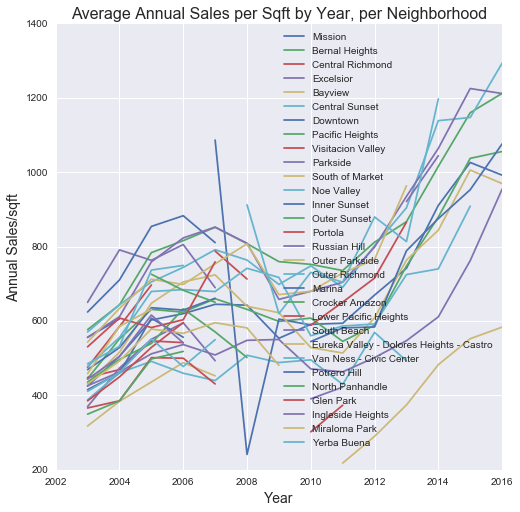

In [189]:
# Check to see whether I still have any *years* that are blank - if yes, try to figure 
# out how to fill it in.

# visualize this to help
# set up figure and axis
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# set x as the years, this doesn't change so keep it out of 
# the for loop
x = range(2003, 2017)

# create a for loop to go through each row in zillow and
# create a line in the plot for each one
for neighborhood_index in clean_zillow.index:
    
    # set each neighborhood's annual price
    y = clean_zillow.iloc[neighborhood_index, 1:]
    
    # plot the line
    ax.plot(x, y, label=clean_zillow.iloc[neighborhood_index,0])

ax.legend()
ax.set_ylabel('Annual Sales/sqft', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_title('Average Annual Sales per Sqft by Year, per Neighborhood',fontsize=16)
plt.show()

In [190]:
##############################
# If I have time, I should   #
# try to figure out imputing #
# the data for the missing   #
# ones.                      #
##############################

In [191]:
clean_zillow.head()

,RegionName,sales_per_sqft_2003,sales_per_sqft_2004,sales_per_sqft_2005,sales_per_sqft_2006,sales_per_sqft_2007,sales_per_sqft_2008,sales_per_sqft_2009,sales_per_sqft_2010,sales_per_sqft_2011,sales_per_sqft_2012,sales_per_sqft_2013,sales_per_sqft_2014,sales_per_sqft_2015,sales_per_sqft_2016
0,Mission,425.050358,505.349255,602.767400,619.712600,644.896182,642.634604,553.512904,591.026255,593.988136,669.652316,741.765660,910.784871,1026.127518,992.075450
1,Bernal Heights,445.232291,551.926064,631.263527,623.748082,659.822992,631.219375,598.916711,607.792556,545.296663,588.379867,747.816284,879.551282,1037.231922,1055.530033
2,Central Richmond,448.055556,469.285714,546.495896,541.832865,NaN,NaN,NaN,NaN,498.000000,NaN,NaN,NaN,NaN,NaN
3,Excelsior,369.952756,473.445950,550.771036,595.158389,493.280306,NaN,NaN,390.804598,422.252222,NaN,499.412456,NaN,NaN,733.333333
4,Bayview,317.752110,384.058537,436.039342,488.090180,452.550075,NaN,NaN,NaN,218.079140,289.923954,374.322563,482.625483,552.459016,583.533173


In [192]:
# then do melt to go from wide to long to get the year into one column

zillow_long = pd.melt(clean_zillow, id_vars='RegionName', var_name="year", 
                      value_name='avg_sales_per_sqft')

In [193]:
# convert the year column 
zillow_long['year'] = zillow_long['year'].map(lambda x: int(x[-4:]))

In [194]:
zillow_long.head()

###############################
# OK I know there are still a few problems with this data
# as-is - for example there are still NaNs for certain
# neighborhoods and certain years. 

# Also, since I know I will have to do some figuring out 
# to match up neighborhoods in the fire csv, I probably
# could have waited before droppig neighborhoods in case
# I decided I wanted to combine them somehow. 

# Which leads me to point #3, which is that it's not 
# exactly entirely an accurate metric because I took a 
# straight average instead of a weighted average. And if I 
# chose to combine two neighborhoods into one, it would
# also be a straight average rather than a weighted one.

# Anyway. I'm going to leave it for now.

,RegionName,year,avg_sales_per_sqft
0,Mission,2003,425.050358
1,Bernal Heights,2003,445.232291
2,Central Richmond,2003,448.055556
3,Excelsior,2003,369.952756
4,Bayview,2003,317.752110


Now I will work with the fire data, clean it (get rid of nans or empty data).

In [195]:
# load the fire data
fire_base = pd.read_csv('../../datasets/san_francisco/san_francisco-1/fire_data/fire_incidents.csv')
fire_base.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [196]:
fire_base.columns

Index([u'Incident Number', u'Exposure Number', u'Address', u'Incident Date',
       u'Call Number', u'Alarm DtTm', u'Arrival DtTm', u'Close DtTm', u'City',
       u'Zipcode', u'Battalion', u'Station Area', u'Box', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel', u'First Unit On Scene',
       u'Estimated Property Loss', u'Estimated Contents Loss',
       u'Fire Fatalities', u'Fire Injuries', u'Civilian Fatalities',
       u'Civilian Injuries', u'Number of Alarms', u'Primary Situation',
       u'Mutual Aid', u'Action Taken Primary', u'Action Taken Secondary',
       u'Action Taken Other', u'Detector Alerted Occupants', u'Property Use',
       u'Area of Fire Origin', u'Ignition Cause', u'Ignition Factor Primary',
       u'Ignition Factor Secondary', u'Heat Source', u'Item First Ignited',
       u'Human Factors Associated with Ignition', u'Structure Type',
       u'Structure Status', u'Floor of Fire Origin', 

In [197]:
# I had a warning message that the data in these columns was mixed dtype.
# I am checking these columns to make sure I don't need them, and yep - 
# don't need 'em. Will ignore the warning message.

fire_base.iloc[:5,[11,12,19, 44, 58]]

,Station Area,Box,First Unit On Scene,Fire Spread,Automatic Extinguishing Sytem Failure Reason
0,15,NaN,T15,NaN,NaN
1,39,8571,E39,NaN,NaN
2,01,NaN,B03,NaN,NaN
3,10,4163,B04,NaN,NaN
4,03,NaN,E03,NaN,NaN


In [198]:
fire_base['Primary Situation'].head()

0           551 - assist pd or other govern. agency
1     745 - alarm system sounded/no fire-accidental
2    711 - municipal alarm system, street box false
3               746 - co detector activation, no co
4    711 - municipal alarm system, street box false
Name: Primary Situation, dtype: object

In [243]:
# subset so that it's only SF and San Francisco in City.
# Filter Primary Situation for fires
# Choose columns "Incident Date,  Neighborhood, 
# Zip Code, Estimated Property loss"

# choose wanted columns
wanted_cols = ['Incident Number','Incident Date', 'Neighborhood  District', 'Zipcode', 
               'Estimated Property Loss']

# choose only rows where (City=SF and San Francisco) AND
# (Primary Situation contains 'fires')

condition1 = fire_base['City'].map(lambda x: x in ['SF','San Francisco'])
condition2 = fire_base['Primary Situation'].map(lambda x: 'fire' in x)
##################################
# not sure why but condition2 is #
# not working - actually i take that
# back it may be working but i need to figure out 
# whether i care taht it's pulling "no fire"
# which is explicitly the opposite of waht i want

# i'm going to keep going for now
##################################

print condition1.head()
print condition2.head()
mask = condition1 & condition2
print mask.head()
fire_intermediate = fire_base[mask].loc[:,wanted_cols]
print fire_intermediate.shape
fire_intermediate.head()

0    True
1    True
2    True
3    True
4    True
Name: City, dtype: bool
0    False
1     True
2    False
3    False
4    False
Name: Primary Situation, dtype: bool
0    False
1     True
2    False
3    False
4    False
dtype: bool
(84355, 5)


,Incident Number,Incident Date,Neighborhood District,Zipcode,Estimated Property Loss
1,13067402,07/18/2013,NaN,NaN,NaN
7,15065212,06/20/2015,Sunset/Parkside,94122.0,800.0
8,10097225,10/31/2010,Potrero Hill,94107.0,NaN
20,6060988,08/05/2006,South of Market,94103.0,0.0
21,5006655,01/25/2005,Russian Hill,94109.0,0.0


In [244]:
# Explain what this is:
# each row is an incident where the fire department got involved. There is data about
# the type of incident (fire or medical emergency, or what), property info, how many
# firefighters were involved, property damage, etc.

# I want to focus only on fires in San Francisco, and convert the incident date
# into year. I want to have X columns: Neighborhood/Region, Year, # Fire Incidents,
# Average Property Damage, Total Property Damage, Zip code

# There will be lots of data cleaning with this one. The data quality is not fantastic.

In [245]:
# change incident date to year
import datetime as dt
fire_intermediate['Year'] = \
  fire_intermediate['Incident Date'].\
    apply(dt.datetime.strptime, args=['%m/%d/%Y'])

fire_intermediate['Year'] = \
  fire_intermediate['Year'].map(lambda x: x.year)
    
fire_intermediate.drop('Incident Date', axis=1, inplace=True)
fire_intermediate.head()

,Incident Number,Neighborhood District,Zipcode,Estimated Property Loss,Year
1,13067402,NaN,NaN,NaN,2013
7,15065212,Sunset/Parkside,94122.0,800.0,2015
8,10097225,Potrero Hill,94107.0,NaN,2010
20,6060988,South of Market,94103.0,0.0,2006
21,5006655,Russian Hill,94109.0,0.0,2005


In [246]:
fire_intermediate.isnull().sum()

Incident Number                0
Neighborhood  District     12685
Zipcode                    12668
Estimated Property Loss    49894
Year                           0
dtype: int64

In [247]:
# Do I have empty data? If it's: 

# Incident Date then drop it. (Year is not null)

# If it's Neighborhood but I have Zip Code, try to fill it.

fire_intermediate['Zipcode'][fire_intermediate['Neighborhood  District'].isnull()].isnull().sum()

# OK this says that of the 12685 missing Neighborhood rows, Zipcode is also
# null for 12664 of them.  Filling it in wouldn't do anything, so 
# I am going to skip this. I *could* see if it is possible with the
# neighborhood data...?
########################################################

# If I hae neither Neighborhood nor Zip Cde, drop it.
# if it's property loss, hmm, drop it.

fire_intermediate.dropna(axis=0, inplace=True)

print fire_intermediate.shape
fire_intermediate.head()


(27724, 5)


,Incident Number,Neighborhood District,Zipcode,Estimated Property Loss,Year
7,15065212,Sunset/Parkside,94122.0,800.0,2015
20,6060988,South of Market,94103.0,0.0,2006
21,5006655,Russian Hill,94109.0,0.0,2005
38,5040114,Bayview Hunters Point,94124.0,0.0,2005
56,3079818,Financial District/South Beach,94111.0,0.0,2003


In [248]:
fire_intermediate.isnull().sum()

Incident Number            0
Neighborhood  District     0
Zipcode                    0
Estimated Property Loss    0
Year                       0
dtype: int64

In [249]:
# do a pivot table/groupby to get # incidents per year, avg prop damage and total prop damage

In [314]:
fire_groupby = \
  fire_intermediate[['Year','Estimated Property Loss',
                    'Neighborhood  District']].\
    groupby(['Year','Neighborhood  District']).count()
    
fire_groupby.reset_index(inplace=True)

fire_groupby.sort_values('Estimated Property Loss',ascending=False)


,Year,Neighborhood District,Estimated Property Loss
86,2005,Financial District/South Beach,627
116,2005,Tenderloin,623
5,2003,Financial District/South Beach,622
127,2006,Financial District/South Beach,618
75,2004,Tenderloin,578
157,2006,Tenderloin,569
35,2003,Tenderloin,509
45,2004,Financial District/South Beach,504
58,2004,Mission,475
18,2003,Mission,450


now I need to make sure I can join the two.

In [315]:
# I need to make sure I can use the same neighborhood column and join the two.
zillow_long.columns

Index([u'RegionName', u'year', u'avg_sales_per_sqft'], dtype='object')

In [316]:
# check that the neighborhood names match. if not, then create approximations/text 
# taht will be the same so i can do a join

fire_nb = fire_groupby['Neighborhood  District'].value_counts().sort_index()
fire_nb.head()


Bayview Hunters Point    14
Bernal Heights           14
Castro/Upper Market      14
Chinatown                14
Excelsior                14
Name: Neighborhood  District, dtype: int64

In [317]:
zillow_nb = zillow_long['RegionName'].value_counts().sort_index()
nb_df = pd.DataFrame([fire_nb.index,zillow_nb.index])

nb_df.index = ['fire','zillow']

# let's go from fire to zillow. ie reduce fire neighborhoods , map fire
# to zillow

map_fire_to_zillow_nb = { 'Bayview Hunters Point' : 'Bayview',
                        'Bernal Heights' : 'Bernal Heights',
                         'Castro/Upper Market' : 'Eureka Valley - Dolores Heights - Castro',
                         'Chinatown' : 'Downtown',
                         'Excelsior' : 'Excelsior',
                         'Financial District/South Beach' : 'South Beach',
                         'Glen Park' : 'Glen Park',
                         'Golden Gate Park' : 'Central Sunset',
                         'Haight Ashbury' : 'North Panhandle',
                         'Hayes Valley' : 'Van Ness - Civic Center',
                         'Inner Richmond' : 'Central Richmond',
                         'Inner Sunset' : 'Inner Sunset',
                         'Japantown' : 'Lower Pacific Heights',
                         'Lakeshore' : 'Outer Parkside',
                         'Lincoln Park' : 'Parkside',
                         'Lone Mountain/USF' : 'Lower Pacific Heights',
                         'Marina' : 'Marina',
                         'McLaren Park' : 'Crocker Amazon',
                         'Mission' : 'Mission',
                         'Mission Bay' : 'South Beach',
                         'Nob Hill' : 'Outer Richmond',
                         'Noe Valley' : 'Noe Valley',
                         'North Beach' : 'Downtown',
                         'Oceanview/Merced/Ingleside' : 'Ingleside Heights',
                         'Outer Mission' : 'Mission',
                         'Outer Richmond' : 'Outer Richmond',
                         'Pacific Heights' : 'Pacific Heights',	
                         'Portola' : 'Portola',
                         'Potrero Hill' : 'Potrero Hill',
                         'Presidio' : 'Outer Richmond',
                         'Presidio Heights' : 'Outer Richmond',
                         'Russian Hill' : 'Russian Hill',
                         'Seacliff' : 'Outer Richmond',
                         'South of Market' : 'South of Market',
                         'Sunset/Parkside' : 'Parkside',
                         'Tenderloin' : 'Downtown',
                         'Twin Peaks' : 'Portola',
                         'Visitacion Valley' : 'Visitacion Valley',
                         'West of Twin Peaks' : 'Portola',
                         'Western Addition' : 'Lower Pacific Heights'
                        }


# remove the rows from "Treasure Island"
mask = fire_groupby['Neighborhood  District'] == 'Treasure Island'
fire_groupby = fire_groupby[~mask]

fire_groupby['mapped_neighborhood'] = fire_groupby['Neighborhood  District'].map(lambda x:\
                                      map_fire_to_zillow_nb[x])

In [318]:
# drop the old neighborhood column
fire_groupby.drop('Neighborhood  District',axis=1, inplace=True)
fire_groupby.head()

,Year,Estimated Property Loss,mapped_neighborhood
0,2003,249,Bayview
1,2003,98,Bernal Heights
2,2003,122,Eureka Valley - Dolores Heights - Castro
3,2003,139,Downtown
4,2003,45,Excelsior


In [333]:
# do a join and drop duplicate columns

new_df = pd.merge(fire_groupby, zillow_long, how='inner', 
         left_on=["mapped_neighborhood",'Year'], right_on=['RegionName','year'])

new_df.drop(['Year','RegionName'],axis=1, inplace=True)

new_df.head()

,Estimated Property Loss,mapped_neighborhood,year,avg_sales_per_sqft
0,249,Bayview,2003,317.752110
1,98,Bernal Heights,2003,445.232291
2,122,Eureka Valley - Dolores Heights - Castro,2003,543.302960
3,139,Downtown,2003,556.060606
4,137,Downtown,2003,556.060606


In [334]:
print new_df.columns
new_df.columns=['count_of_fires','neighborhood', 'year', 'avg_sales_per_sqft']

new_df.head()

Index([u'Estimated Property Loss', u'mapped_neighborhood', u'year',
       u'avg_sales_per_sqft'],
      dtype='object')


,count_of_fires,neighborhood,year,avg_sales_per_sqft
0,249,Bayview,2003,317.752110
1,98,Bernal Heights,2003,445.232291
2,122,Eureka Valley - Dolores Heights - Castro,2003,543.302960
3,139,Downtown,2003,556.060606
4,137,Downtown,2003,556.060606


<b>My hypothesis is that: </b>
 ~ neighborhood + year + annual avg sales per sqft

OR 

estimated property damage from fires ~ neighborhood + year + annual avg sales per sqft

In other words, that 'chance' is not completely driving the incidence of fires in SF.

<b> Visualizations</b>

In [387]:
new_df.shape

(358, 4)

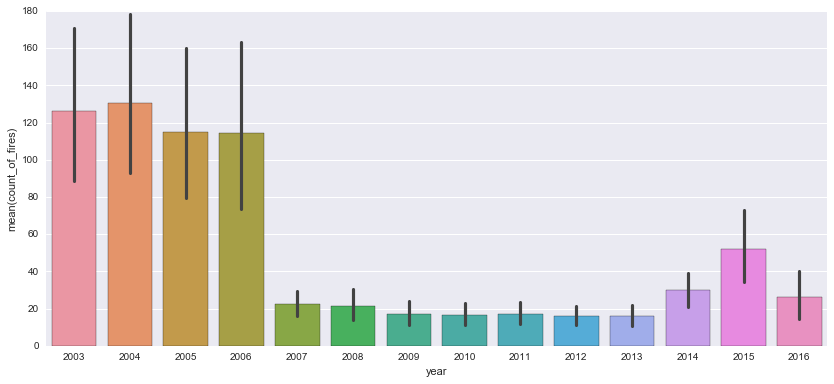

In [389]:
# fires by year and neighborhood

fig = plt.figure(figsize=(14,6))
ax = fig.gca()

ax = sns.barplot(x='year', y="count_of_fires", data=new_df)

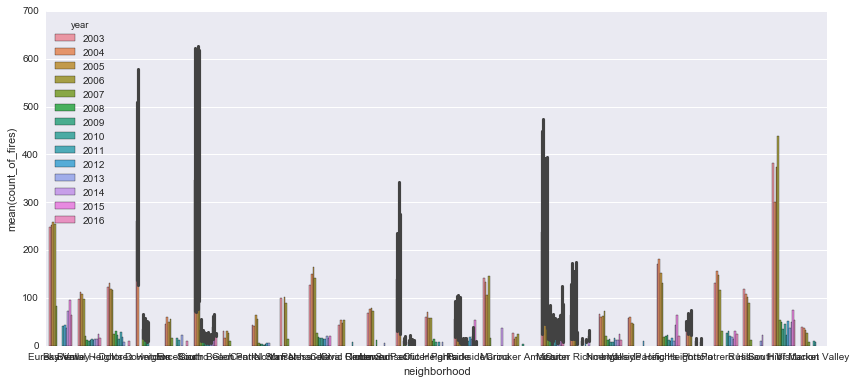

In [388]:
# fires by year and neighborhood

fig = plt.figure(figsize=(14,6))
ax = fig.gca()

ax = sns.barplot(x='neighborhood', y="count_of_fires", hue="year", data=new_df)


###########
# If I had more time, I would investigate those high columns to look at whether 
# there is a data error.

In [207]:
# correlation heat map of all variables

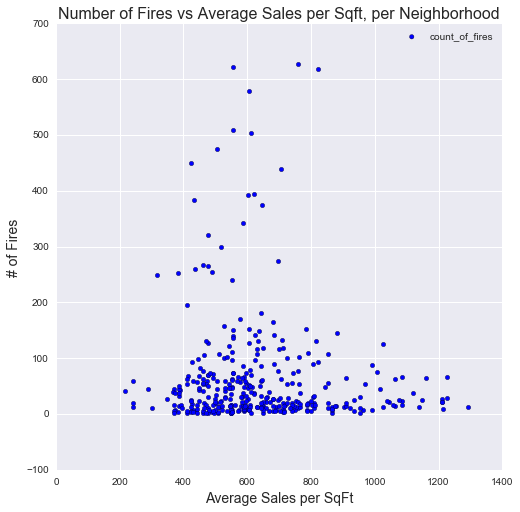

In [363]:
# plot a scatter of avg sales per sqft vs # of fires
# also plot avg sales per sqft vs estimated property loss (seems obv that they
# are related - the greater the value of the property, the greater the loss)

# Can you make the hue the year?

# set up figure and axis
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# set up the scatter plot
ax.scatter(new_df['avg_sales_per_sqft'], new_df['count_of_fires'])

# set up legend, labels, titles, and show
ax.legend()
ax.set_ylabel('# of Fires', fontsize=14)
ax.set_xlabel('Average Sales per SqFt', fontsize=14)
ax.set_title('Number of Fires vs Average Sales per Sqft, per Neighborhood',fontsize=16)
plt.show()

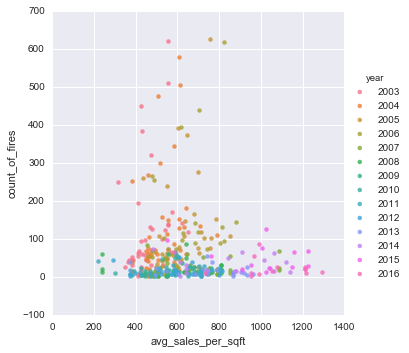

In [381]:
# plot a scatter of avg sales per sqft vs # of fires USING SEABORN
# also plot avg sales per sqft vs estimated property loss (seems obv that they
# are related - the greater the value of the property, the greater the loss)

# Can you make the hue the year?

# set up the scatter plot
sns.lmplot('avg_sales_per_sqft', 'count_of_fires',new_df, 'year', fit_reg=False)

# set up legend, labels, titles, and show
ax.legend()
ax.set_ylabel('# of Fires', fontsize=14)
ax.set_xlabel('Average Sales per SqFt', fontsize=14)
ax.set_title('Number of Fires vs Average Sales per Sqft, per Neighborhood',fontsize=16)
plt.show()

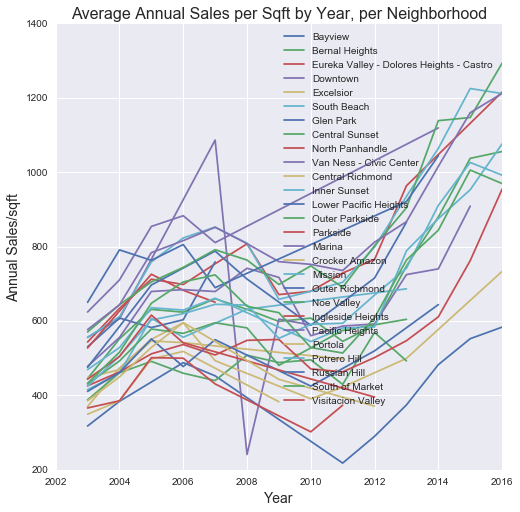

In [359]:
# cleaner plot of avg sales per sqft with cleaner data

# set up figure and axis
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# set x as the years, this doesn't change so keep it out of 
# the for loop


# create a for loop to go through each *neighborhood* in zillow. 
# set the y to be the sqft per neighborhood - set up indices 
# create a line in the plot for each one
for neighborhood in new_df['neighborhood'].unique():
    
    # groupby neighborhood and sort
    nb_groupby = new_df[new_df['neighborhood'] == neighborhood].\
      groupby(['year','neighborhood'])[['avg_sales_per_sqft']].mean()
        
    nb_groupby.sort_index(level='year', inplace=True)
    
    nb_groupby.reset_index(inplace=True)
    
    # set each neighborhood's annual price
    y = nb_groupby['avg_sales_per_sqft']
    x = nb_groupby['year']
    
    # plot the line
    ax.plot(x, y, label=neighborhood)

ax.legend()
ax.set_ylabel('Annual Sales/sqft', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_title('Average Annual Sales per Sqft by Year, per Neighborhood',fontsize=16)
plt.show()

In [ ]:
# The downtown (purple) line above looks like it is being an outlier 
# in 2007, but there are TWO data points that are super high in that
# range, so I am not sure that it is actually an outlier. going to
# leave it in.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [337]:
print new_df.isnull().sum()

new_df.dropna(axis=0, inplace=True)

new_df.isnull().sum()

count_of_fires          0
neighborhood            0
year                    0
avg_sales_per_sqft    183
dtype: int64


count_of_fires        0
neighborhood          0
year                  0
avg_sales_per_sqft    0
dtype: int64

In [394]:
y.head(20)

0     249
1      98
2     122
3     139
4     137
5     509
6      45
7     622
8      73
9      30
10     43
11    100
12    127
13     43
14     68
15     30
16     70
17    320
18     60
19     18
Name: count_of_fires, dtype: int64

In [401]:
# do the linear regression with train/test 
print new_df.shape
new_df.head()
formula = 'count_of_fires ~ neighborhood + year + avg_sales_per_sqft'

y, X = patsy.dmatrices(formula, data=new_df, return_type='dataframe')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm = LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print score

(358, 4)
0.001490572234


In [408]:
# do linear regression with cross val

predictions_cv = cross_val_predict(model, X, y, cv=5)
score_cv = cross_val_score(model, X, y, cv=5)

# print predictions_cv
print score_cv

# Oh dear my scores are terrible!

[  0.08300887   0.20734851  -1.73078196 -12.17639887 -14.4808671 ]


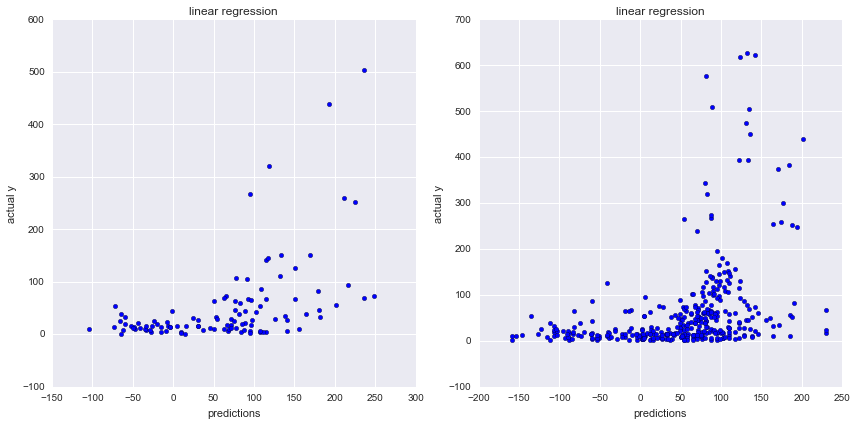

In [413]:
# Visualize the evaluation metrics of your analysis in clear charts.
# plot predictions vs true y
fig = plt.figure(figsize=(12,6))

# linear regression
ax1 = fig.add_subplot(121)
ax1.scatter(predictions, y_test, )
ax1.set_xlabel("predictions")
ax1.set_ylabel("actual y")
ax1.set_title("linear regression")


# cross validation
ax2 = fig.add_subplot(122)
ax2.scatter(predictions_cv, y)
ax2.set_xlabel("predictions")
ax2.set_ylabel("actual y")
ax2.set_title("cross validation - linear regression")


fig.tight_layout()

In [415]:
X.head()

,Intercept,neighborhood[T.Bernal Heights],neighborhood[T.Central Richmond],neighborhood[T.Central Sunset],neighborhood[T.Crocker Amazon],neighborhood[T.Downtown],neighborhood[T.Eureka Valley - Dolores Heights - Castro],neighborhood[T.Excelsior],neighborhood[T.Glen Park],neighborhood[T.Ingleside Heights],...,neighborhood[T.Parkside],neighborhood[T.Portola],neighborhood[T.Potrero Hill],neighborhood[T.Russian Hill],neighborhood[T.South Beach],neighborhood[T.South of Market],neighborhood[T.Van Ness - Civic Center],neighborhood[T.Visitacion Valley],year,avg_sales_per_sqft
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.0,317.752110
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.0,445.232291
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.0,543.302960
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.0,556.060606
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.0,556.060606


In [416]:
model.intercept_

array([ 33343.53559358])

In [414]:
model.coef_

array([[ -1.33566783e-11,  -1.02786583e+02,  -1.61059958e+02,
         -1.38796152e+02,  -1.86410245e+02,  -6.85358505e+01,
         -1.12946815e+02,  -1.51837409e+02,  -1.96109058e+02,
         -1.49629506e+02,  -1.28309659e+02,  -1.28407446e+02,
         -1.06060663e+02,  -4.18208880e+01,  -1.56916561e+02,
         -1.44354310e+02,  -1.51393212e+02,  -1.34872323e+02,
         -9.99769570e+01,  -1.38255987e+02,  -1.51868613e+02,
         -9.35839750e+01,  -1.44178730e+02,  -3.14290191e+00,
         -1.86848825e+01,  -9.59359700e+01,  -1.67923179e+02,
         -1.65385685e+01,   6.30774978e-02]])

In [ ]:
# Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.

# My hypothesis is whether I can predict the annual number of fires in a 
# San Francisco neighborhood by using a linear regression model, and 
# by looking at the neighborhood, the year, and a measure of the 
# housing prices in that neighborhood (the average sale price per 
# square feet).  

# It turns out this is not a good hypothesis - one measure of the
# predictive power of this model, the R-squared, falls at 0.001.  This
# is on a scale between 0 and 1 - 1 being best, 0 being worst.  This
# result falls nearly at 0.

# Not only that, but upon running another statistical test, 
# cross validation, it shows that our results across different populations
# were not consistent. This means that to achieve the best predictions, 
# the model "overfit" the data and performed inconsistently on various
# test populations.  


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
# R^2 and MSE are both measures of fit.  Differences:
# - R^2 goes between 0 and 1, with 0 being the same as the baseline, and 
#   being a perfect fit.  R^2 can also go negative if fit is worse than
#   baseline.  MSE has to be positive, since it is the mean of *squares*.
#   It can be as low as 0 and as high as anything.
#   
# - R^2 has not "units". It's a measure of improvement proportional to
#   the baseline.  MSE's unit is the unit of y, squared.
#
# - As R^2 goes up and approaches 1, MSE goes down and approaches 0.
#
# - MSE is hard to interpret because it is absolute whereas R^2 
#   is relative.  The numbers below are a little hard to interpret
#   becuase what does 6614 mean?  The second number is higher,
#   which I think has to do with the fact that we are adding more
#   data into the training population (on the whole y population 
#   with cross-validation versus with just the training population)
#   and I think the higher MSE reflects the fact that there is a lot
#   of variance in thsi model. (I hope I used the word variance right
#   here)

In [420]:
from sklearn.metrics import mean_squared_error 

lr_mse = mean_squared_error(y_test, predictions)
print lr_mse

lrcv_mse = mean_squared_error(y, predictions_cv)
print lrcv_mse

6614.40886401
10314.959208


In [ ]:
# R^2 in cross validation means that the model has overfit to the data.
# In my case, some of the R^2 are not negative and some are, which 
# shows that the Linear Regression model has overfit in its efforts 
# to explain the data.  Sometimes the test data was similar enough
# to the training data to get a non-negative R^2, and in other
# cases it was "different" enough that the model did worse than
# the baseline model.  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [ ]:
# park info
# park scores


# predict park scores by parkID, supervisor district, FQ (year and quarter)
# park type, zipcode (categorical), acreage, 

# 311 calls
# schools
# 311 calls per district, # schools per district, 

In [447]:
park_info = pd.read_csv('/Users/Cecilia/Desktop/DSI-SF-2-clambeer/datasets/san_francisco/san_francisco/parks/park_info.csv')

park_scores = pd.read_csv('/Users/Cecilia/Desktop/DSI-SF-2-clambeer/datasets/san_francisco/san_francisco/parks/park_scores.csv')

print park_info.head()
print park_scores.head()

                     ParkName                         ParkType  \
0                    ParkName                         ParkType   
1  10TH AVE/CLEMENT MINI PARK                        Mini Park   
2           15TH AVENUE STEPS                        Mini Park   
3         24TH/YORK MINI PARK                        Mini Park   
4     29TH/DIAMOND OPEN SPACE  Neighborhood Park or Playground   

   ParkServiceArea       PSAManager                     email          Number  \
0  ParkServiceArea       PSAManager                     email          Number   
1            PSA 1     Elder, Steve    steven.elder@sfgov.org  (415) 601-6501   
2            PSA 4    Sheehy, Chuck  charles.sheehy@sfgov.org  (415) 218-2226   
3            PSA 6    Field, Adrian    adrian.field@sfgov.org  (415) 717-2872   
4            PSA 5  O'Brien, Teresa  teresa.o'brien@sfgov.org  (415) 819-2699   

   Zipcode  Acreage  SupDist  ParkID  \
0      NaN      NaN      NaN     NaN   
1  94118.0     0.66      1.0   156.0

In [448]:
for column in park_info:
    if len(park_info[column].value_counts()) >= 10:
        print column, ':  \n', park_info[column].value_counts().iloc[0:10,]
    else:
        print column, ':  \n', park_info[column].value_counts()

ParkName :  
BUSH/BRODERICK MINI PARK           1
ROLPH NICOL PLAYGROUND             1
SHARP PARK                         1
DOUGLASS PLAYGROUND                1
GRAND VIEW OPEN SPACE              1
BAY VIEW PLAYGROUND                1
GENE FRIEND REC CENTER             1
UPPER NOE RECREATION CENTER        1
CORONA HEIGHTS                     1
FATHER ALFRED E. BOEDDEKER PARK    1
Name: ParkName, dtype: int64
ParkType :  
Neighborhood Park or Playground    131
Mini Park                           45
Regional Park                       19
Community Garden                    18
Civic Plaza or Square               10
Concession                           2
Parkway                              2
ParkType                             1
Zoological Garden                    1
Family Camp                          1
Name: ParkType, dtype: int64
ParkServiceArea :  
PSA 1                       50
PSA 5                       39
PSA 2                       38
PSA 4                       34
PSA 6       

In [449]:
park_info.isnull().sum()

ParkName             0
ParkType             0
ParkServiceArea      0
PSAManager           0
email                0
Number               0
Zipcode              7
Acreage              1
SupDist              3
ParkID               1
Location 1          28
Lat                230
dtype: int64

In [450]:
park_info.drop(['Location 1','Lat','ParkID'], axis=1,inplace=True)

In [451]:
park_info.dropna(axis=0,inplace=True)
    
park_info.isnull().sum()

ParkName           0
ParkType           0
ParkServiceArea    0
PSAManager         0
email              0
Number             0
Zipcode            0
Acreage            0
SupDist            0
dtype: int64

In [452]:
park_info.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0
5,ADAM ROGERS PARK,Neighborhood Park or Playground,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0


In [453]:
park_info.drop(['PSAManager', 'email', 'Number'], axis=1, inplace=True)

In [454]:
psa_map = {
    'PSA 1' : 'PSA1',
    'PSA 5' : 'PSA5',
    'PSA 2' : 'PSA2',
    'PSA 4' : 'PSA4',
    'PSA 6' : 'PSA6',
    'PSA 3' : 'PSA3',
    'Golden Gate Park' : 'GGP', 
    'Candlestick Park Stadium' : 'Candlestick'
}

park_info['PSA'] = park_info['ParkServiceArea'].map(lambda x: psa_map[x])

park_info.head()

,ParkName,ParkType,ParkServiceArea,Zipcode,Acreage,SupDist,PSA
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,94118.0,0.66,1.0,PSA1
2,15TH AVENUE STEPS,Mini Park,PSA 4,94122.0,0.26,7.0,PSA4
3,24TH/YORK MINI PARK,Mini Park,PSA 6,94110.0,0.12,9.0,PSA6
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,94131.0,0.82,8.0,PSA5
5,ADAM ROGERS PARK,Neighborhood Park or Playground,PSA 3,94124.0,2.74,10.0,PSA3


In [455]:
park_info.drop('ParkServiceArea', axis=1, inplace=True)
park_info.head()

,ParkName,ParkType,Zipcode,Acreage,SupDist,PSA
1,10TH AVE/CLEMENT MINI PARK,Mini Park,94118.0,0.66,1.0,PSA1
2,15TH AVENUE STEPS,Mini Park,94122.0,0.26,7.0,PSA4
3,24TH/YORK MINI PARK,Mini Park,94110.0,0.12,9.0,PSA6
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,94131.0,0.82,8.0,PSA5
5,ADAM ROGERS PARK,Neighborhood Park or Playground,94124.0,2.74,10.0,PSA3


In [456]:
for column in park_scores:
    if len(park_scores[column].value_counts()) >= 10:
        print column, ':  \n', park_scores[column].value_counts().iloc[0:10,]
    else:
        print column, ':  \n', park_scores[column].value_counts()

ParkID :  
94        118
28         80
10         55
756669     45
164        41
756668     39
81         36
756665     35
56         35
119        34
Name: ParkID, dtype: int64
PSA :  
PSA1    1355
PSA2     978
PSA3     770
PSA4     717
PSA5     710
PSA6     640
GGP      325
Name: PSA, dtype: int64
Park :  
Golden Gate Park                118
John McLaren Park                80
Lake Merced Park                 55
Golden Gate Park - Section 5     45
Crocker Amazon Playground        41
Golden Gate Park - Section 4     39
Buena Vista Park                 36
South Park                       35
Golden Gate Park - Section 1     35
Duboce Park                      34
Name: Park, dtype: int64
FQ :  
FY14Q3    203
FY14Q4    198
FY14Q2    187
FY14Q1    184
FY13Q4    183
FY13Q3    174
FY10Q4    173
FY09Q2    172
FY09Q4    172
FY10Q3    170
Name: FQ, dtype: int64
Score :  
1.000    934
0.976     65
0.957     53
0.944     49
0.971     48
0.875     47
0.938     47
0.978     45
0.900     45
0.974   

In [457]:
park_scores.isnull().sum()

ParkID    0
PSA       0
Park      0
FQ        0
Score     1
dtype: int64

In [458]:
park_scores.dropna(axis=0, inplace=True)

In [459]:
map_year = {
    'FY05' : 2005,
    'FY06' : 2006,
    'FY07' : 2007,
    'FY08' : 2008,
    'FY09' : 2009,
    'FY10' : 2010,
    'FY11' : 2011,
    'FY12' : 2012,
    'FY13' : 2013,
    'FY14' : 2014
}

park_scores['Year'] = park_scores['FQ'].map(lambda x: map_year[x[0:4]])

park_scores.head()

,ParkID,PSA,Park,FQ,Score,Year
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,2005
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957,2005
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864,2005
3,117,PSA2,Alamo Square,FY05Q4,0.857,2005
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859,2005


In [460]:
park_scores['Quarter'] = park_scores['FQ'].map(lambda x: x[-1])

park_scores.head()

,ParkID,PSA,Park,FQ,Score,Year,Quarter
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,2005,3
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957,2005,3
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864,2005,3
3,117,PSA2,Alamo Square,FY05Q4,0.857,2005,4
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859,2005,4


In [461]:
park_scores.drop('FQ', axis=1, inplace=True)

park_scores.head()

,ParkID,PSA,Park,Score,Year,Quarter
0,86,PSA4,Carl Larsen Park,0.795,2005,3
1,13,PSA4,Junipero Serra Playground,0.957,2005,3
2,9,PSA4,Rolph Nicol Playground,0.864,2005,3
3,117,PSA2,Alamo Square,0.857,2005,4
4,60,PSA6,Jose Coronado Playground,0.859,2005,4


In [466]:
park_scores['Park'] = park_scores['Park'].map(lambda x: x.upper())
park_scores.head()

,ParkID,PSA,Park,Score,Year,Quarter
0,86,PSA4,CARL LARSEN PARK,0.795,2005,3
1,13,PSA4,JUNIPERO SERRA PLAYGROUND,0.957,2005,3
2,9,PSA4,ROLPH NICOL PLAYGROUND,0.864,2005,3
3,117,PSA2,ALAMO SQUARE,0.857,2005,4
4,60,PSA6,JOSE CORONADO PLAYGROUND,0.859,2005,4


join tables on Park

In [467]:
park = pd.merge(park_scores, park_info, how='inner', left_on=['Park'], right_on=['ParkName'])

park.head()

,ParkID,PSA_x,Park,Score,Year,Quarter,ParkName,ParkType,Zipcode,Acreage,SupDist,PSA_y
0,86,PSA4,CARL LARSEN PARK,0.795,2005,3,CARL LARSEN PARK,Neighborhood Park or Playground,94116.0,6.58,4.0,PSA4
1,86,PSA4,CARL LARSEN PARK,0.813,2006,1,CARL LARSEN PARK,Neighborhood Park or Playground,94116.0,6.58,4.0,PSA4
2,86,PSA4,CARL LARSEN PARK,0.256,2006,2,CARL LARSEN PARK,Neighborhood Park or Playground,94116.0,6.58,4.0,PSA4
3,86,PSA4,CARL LARSEN PARK,0.648,2006,4,CARL LARSEN PARK,Neighborhood Park or Playground,94116.0,6.58,4.0,PSA4
4,86,PSA4,CARL LARSEN PARK,0.716,2007,2,CARL LARSEN PARK,Neighborhood Park or Playground,94116.0,6.58,4.0,PSA4


In [468]:
park.drop(['PSA_y', 'ParkName'], axis=1, inplace=True)

park.head()

,ParkID,PSA_x,Park,Score,Year,Quarter,ParkType,Zipcode,Acreage,SupDist
0,86,PSA4,CARL LARSEN PARK,0.795,2005,3,Neighborhood Park or Playground,94116.0,6.58,4.0
1,86,PSA4,CARL LARSEN PARK,0.813,2006,1,Neighborhood Park or Playground,94116.0,6.58,4.0
2,86,PSA4,CARL LARSEN PARK,0.256,2006,2,Neighborhood Park or Playground,94116.0,6.58,4.0
3,86,PSA4,CARL LARSEN PARK,0.648,2006,4,Neighborhood Park or Playground,94116.0,6.58,4.0
4,86,PSA4,CARL LARSEN PARK,0.716,2007,2,Neighborhood Park or Playground,94116.0,6.58,4.0


In [470]:
park.dtypes

ParkID        int64
PSA_x        object
Park         object
Score       float64
Year          int64
Quarter      object
ParkType     object
Zipcode     float64
Acreage     float64
SupDist     float64
dtype: object

In [472]:
park['Quarter'] = park['Quarter'].map(lambda x: int(x))
park['Zipcode'] = park["Zipcode"].map(lambda x: int(x))
park['SupDist'] = park["SupDist"].map(lambda x: int(x))

park.dtypes

ParkID        int64
PSA_x        object
Park         object
Score       float64
Year          int64
Quarter       int64
ParkType     object
Zipcode       int64
Acreage     float64
SupDist       int64
dtype: object

In [474]:
park.drop('Park', axis=1, inplace=True)

park.head()

,ParkID,PSA_x,Score,Year,Quarter,ParkType,Zipcode,Acreage,SupDist
0,86,PSA4,0.795,2005,3,Neighborhood Park or Playground,94116,6.58,4
1,86,PSA4,0.813,2006,1,Neighborhood Park or Playground,94116,6.58,4
2,86,PSA4,0.256,2006,2,Neighborhood Park or Playground,94116,6.58,4
3,86,PSA4,0.648,2006,4,Neighborhood Park or Playground,94116,6.58,4
4,86,PSA4,0.716,2007,2,Neighborhood Park or Playground,94116,6.58,4


In [477]:
# hypothesis is that we can predict the park score using the ParkID, Park Service
# Area, the Year, teh quarter, park type, zipcode, acreage, and supervisor district.

formula = 'Score ~ ParkID + PSA_x + Year + Quarter + ParkType + Zipcode + Acreage + SupDist -1'

y, X = patsy.dmatrices(formula, data=park, return_type='dataframe')

print y.head()
y = np.ravel(y)


print X.head()

   Score
0  0.795
1  0.813
2  0.256
3  0.648
4  0.716
   PSA_x[GGP]  PSA_x[PSA1]  PSA_x[PSA2]  PSA_x[PSA3]  PSA_x[PSA4]  \
0         0.0          0.0          0.0          0.0          1.0   
1         0.0          0.0          0.0          0.0          1.0   
2         0.0          0.0          0.0          0.0          1.0   
3         0.0          0.0          0.0          0.0          1.0   
4         0.0          0.0          0.0          0.0          1.0   

   PSA_x[PSA5]  PSA_x[PSA6]  ParkType[T.Mini Park]  \
0          0.0          0.0                    0.0   
1          0.0          0.0                    0.0   
2          0.0          0.0                    0.0   
3          0.0          0.0                    0.0   
4          0.0          0.0                    0.0   

   ParkType[T.Neighborhood Park or Playground]  ParkType[T.Parkway]  \
0                                          1.0                  0.0   
1                                          1.0                  

In [503]:
# Construct and evaluate different models with cross-validated R2 . 
# Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
# Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.

model = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]

param_grid = {
    '0' : {
        'fit_intercept' : [True, False]
        },
    '1' : {
        'alpha' : [-1,-0.1, 0.1, 1, 10, 100],
        'fit_intercept' : [True, False],
        'normalize' : [True, False]
        },
    '2' : {
        'alpha' : [-1,-0.1, 0.1, 1, 10, 100],
        'fit_intercept' : [True, False],
        'normalize' : [True, False]
        },
    '3' : {
        'alpha' : [-1,-0.1, 0.1, 1, 10, 100],
        'fit_intercept' : [True, False],
        'normalize' : [True, False],
        'l1_ratio' : [0.2, 0.4, 0.6, 0.8]    
        }   
}

# param_grid['0']

for i, model in enumerate(model):
#     print model
#     print type(model)
#     print param_grid[str(i)]
    estimator = GridSearchCV(model, param_grid[str(i)], cv=5)
    results = estimator.fit(X, y)
    score = results.best_score_
    params = results.best_params_
    
    print 'Model: ', model, ': \n'
    print 'Score: ', score
    print 'Params: ', params
    print '---------------------\n'

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) : 

Score:  -4.13497430322
Params:  {'fit_intercept': True}
---------------------

Model:  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) : 

Score:  -0.00472769501811
Params:  {'normalize': True, 'alpha': 1, 'fit_intercept': False}
---------------------

Model:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) : 

Score:  -0.0562434097098
Params:  {'normalize': True, 'alpha': 100, 'fit_intercept': True}
---------------------

Model:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) : 

Score:  0.00296321034993
Params

In [ ]:
# Report on which model is best, and why that might be the case 
#(hint: does your data have multicollinearity? Irrelevant variables? Both?)

# The Elastic Net model produces the best results.  
# First of all, compared to the LinearRegression model by itself, all
# models with regularization improve the result.  Lasso seems to improve
# the result more than Ridge. This makes sense - there may be some predictor 
# variables that do not contribute anything.
# However, it also makes sense to use Ridge to generally just reduce the impact
# of all variables without removing any, as the predictive value of the
# variables may change depending on the next data point.
# So that seems to be why the ElasticNet is helpful.

# In addition to irrelevant variables, there are a lot of highly correlated
# variables. I know this because each park has score data over many quarters.
# And every time I show the park, I list all of its other data, such as
# location, Park Service Area, and otehr things that *never change*. 
# So there is a lot of repetitive data that by definition is highly correlated.

In [ ]:
# Plot visuals that compare the performance of the four models.

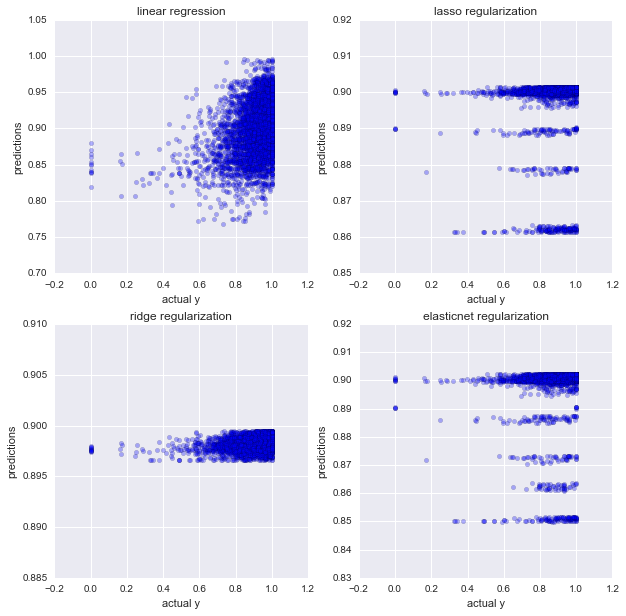

In [505]:
fig = plt.figure(figsize=(10,10))

# linearRegression
lr = LinearRegression(fit_intercept=True)
model = lr.fit(X,y)
predictions = model.predict(X)

ax1 = fig.add_subplot(221)
ax1.scatter(y, predictions, alpha=0.3)
ax1.set_xlabel("actual y")
ax1.set_ylabel("predictions")
ax1.set_title("linear regression")

# Lasso
lasso = Lasso(normalize=True, alpha=1, fit_intercept=False)
model = lasso.fit(X,y)
predictions = model.predict(X)

ax1 = fig.add_subplot(222)
ax1.scatter(y, predictions, alpha=0.3)
ax1.set_xlabel("actual y")
ax1.set_ylabel("predictions")
ax1.set_title("lasso regularization")

# Ridge
ridge = Ridge(normalize=True, alpha=100, fit_intercept=True)
model = ridge.fit(X,y)
predictions = model.predict(X)

ax1 = fig.add_subplot(223)
ax1.scatter(y, predictions, alpha=0.3)
ax1.set_xlabel("actual y")
ax1.set_ylabel("predictions")
ax1.set_title("ridge regularization")

# ElasticNet
elasticnet = ElasticNet(normalize=True, alpha=1, fit_intercept=False, l1_ratio=0.6) 
model = elasticnet.fit(X,y)
predictions = model.predict(X)

ax1 = fig.add_subplot(224)
ax1.scatter(y, predictions, alpha=0.3)
ax1.set_xlabel("actual y")
ax1.set_ylabel("predictions")
ax1.set_title("elasticnet regularization")

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?